Dataset link to download: Dataset is publicly available
at http://www.unb.ca/cic/datasets/IDS2017.html


Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv to Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


**1.Importing Required Libraries**

In [2]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

 **2.Data Preprocessing**





2.1 Load the dataset


In [5]:
#2. Load the Dataset
import pandas as pd

# Automatically detect the uploaded file name
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Display the first few rows
df.head()



,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


2.2 Null values and Data types

In [26]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


2.3 Drop rows with missing/null values

In [37]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


In [45]:
# Check for missing values
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False).head())

# Drop rows with NaN or Inf values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check if all features are numeric
non_numeric = df.select_dtypes(exclude=[np.number])
print("Non-numeric columns:\n", non_numeric.columns)

# Drop non-numeric columns if any
df = df.select_dtypes(include=[np.number])

print(f"Final shape after preprocessing: {df.shape}")


Missing values:
 Flow Bytes/s                   4
Flow Duration                  0
Destination Port               0
Total Backward Packets         0
Total Length of Fwd Packets    0
dtype: int64
Non-numeric columns:
 Index([], dtype='object')
Final shape after preprocessing: (223082, 79)


**Label Encoding**


In [46]:
# Load and clean column names
df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df.columns = df.columns.str.strip()  # <- important fix

# Proceed with label encoding
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


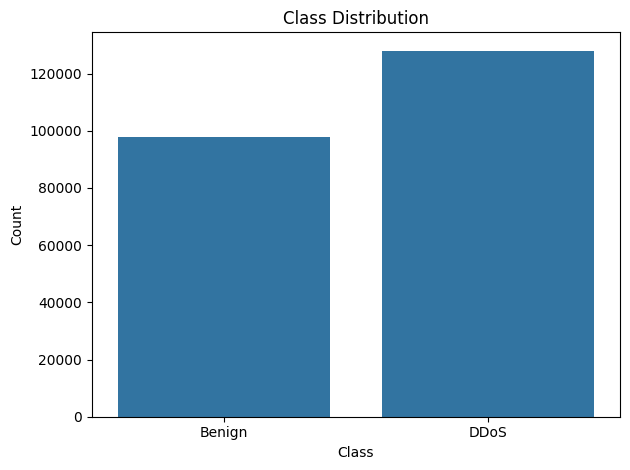

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Label'].map({0: 'Benign', 1: 'DDoS'}))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Data Exploration**

In [48]:
df.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06,1.000000
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null

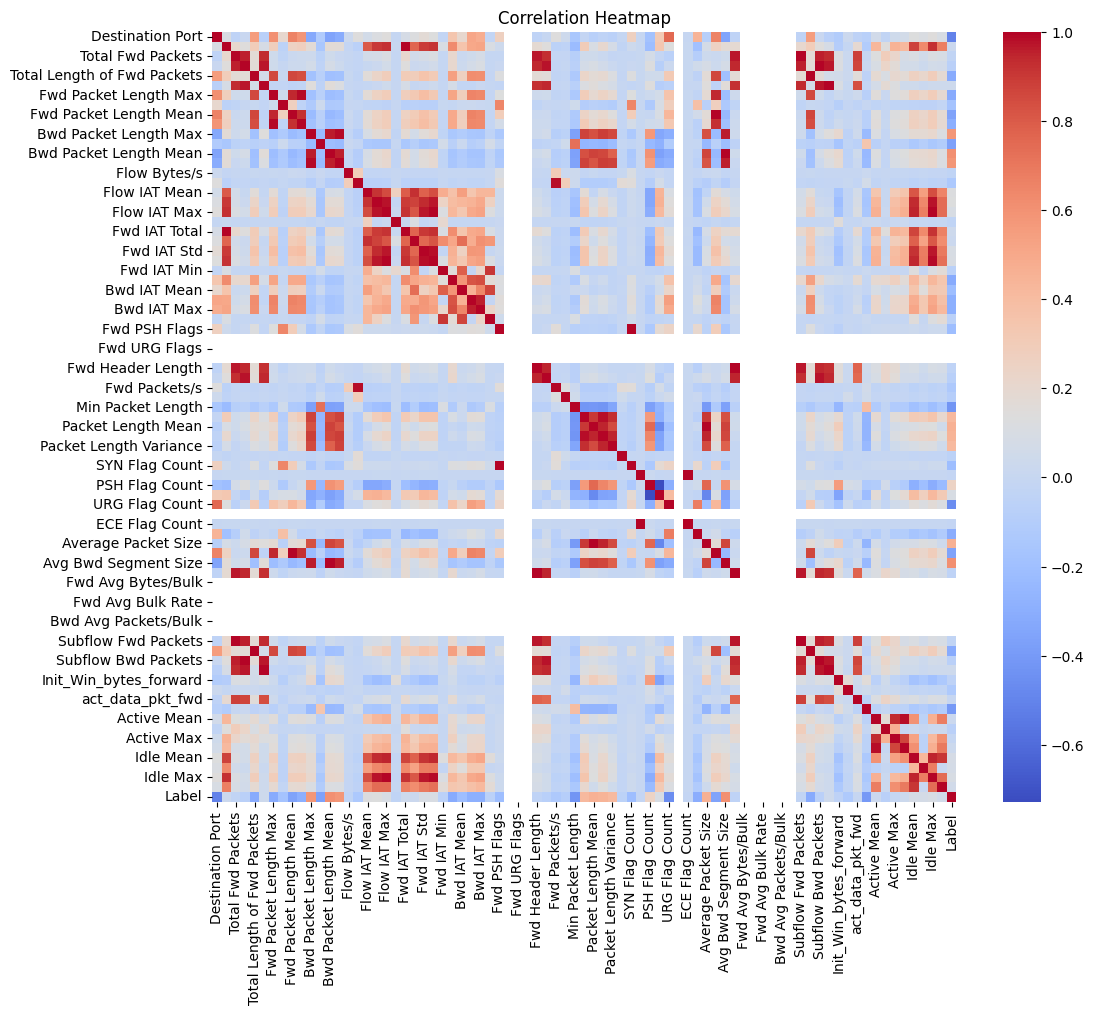

In [51]:
# Basic info
print("Dataset Info:")
print(df.info())

# Descriptive stats
print("\nDescriptive Statistics:")
print(df.describe())

# Class distribution
class_counts = df['Label'].value_counts()
print("\nClass Distribution:")
print(class_counts)


# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

**Train-Test Split**

In [18]:
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
df.drop(columns=non_numeric_cols, inplace=True, errors='ignore')


In [53]:
# Separate features and target
X = df.drop('Label', axis=1)   # Features
y = df['Label']                # Target label (0 = Benign, 1 = DDoS)

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Confirm shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (158021, 78)
Test data shape: (67724, 78)


**MODEL TRAINING**

Random Forest

In [55]:
# Replace inf and -inf with NaN, then drop any rows with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# y is aligned after dropping rows
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)


Visualisation

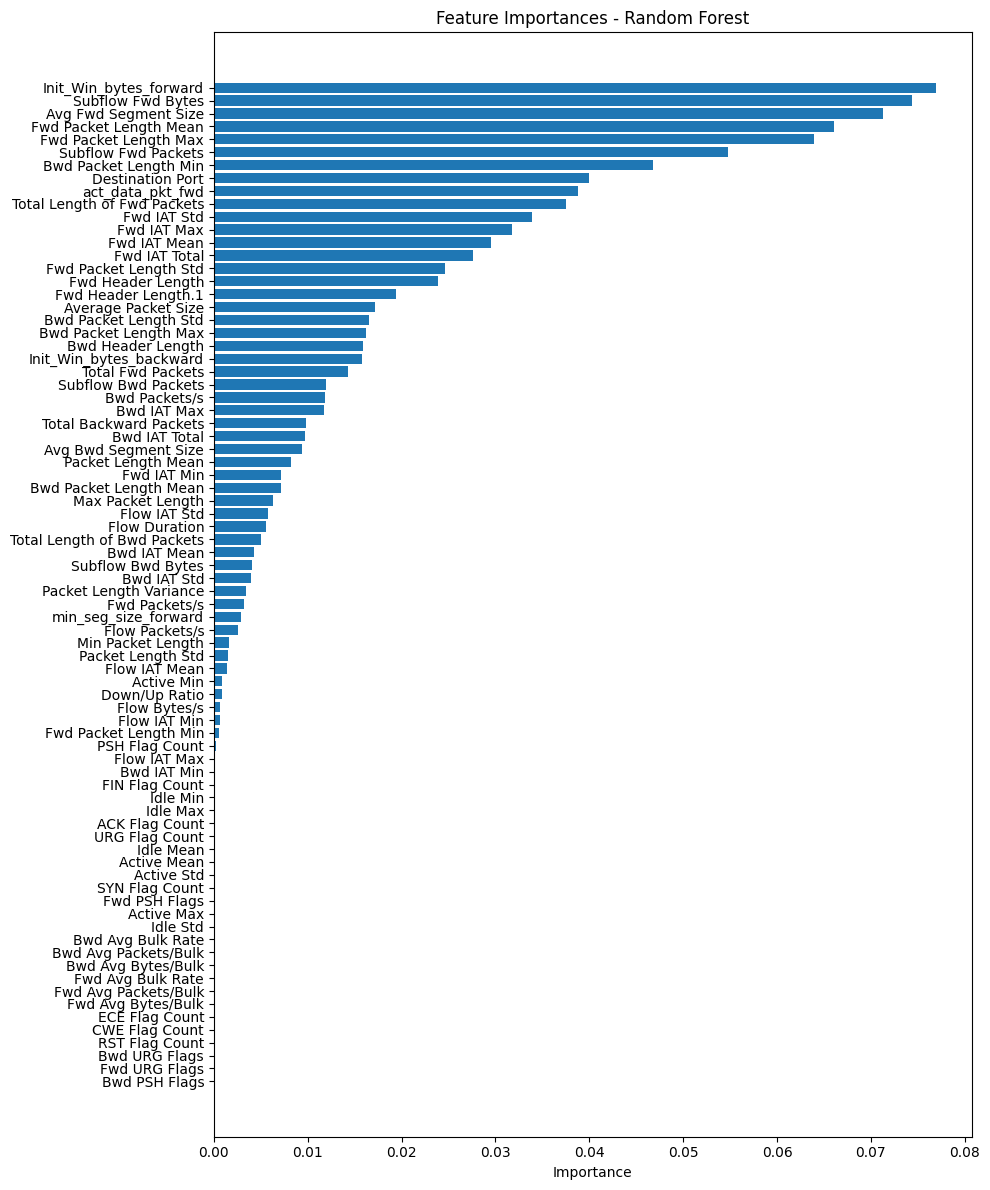

In [57]:
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Sort feature indices by importance (ascending)
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)

# Use actual feature names instead of "Features i"
feature_names = X_train.columns

# Reorder names based on sorted indices
sorted_feature_names = [feature_names[i] for i in indices]

# Plotting feature importances horizontally
plt.figure(figsize=(10, 12))
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


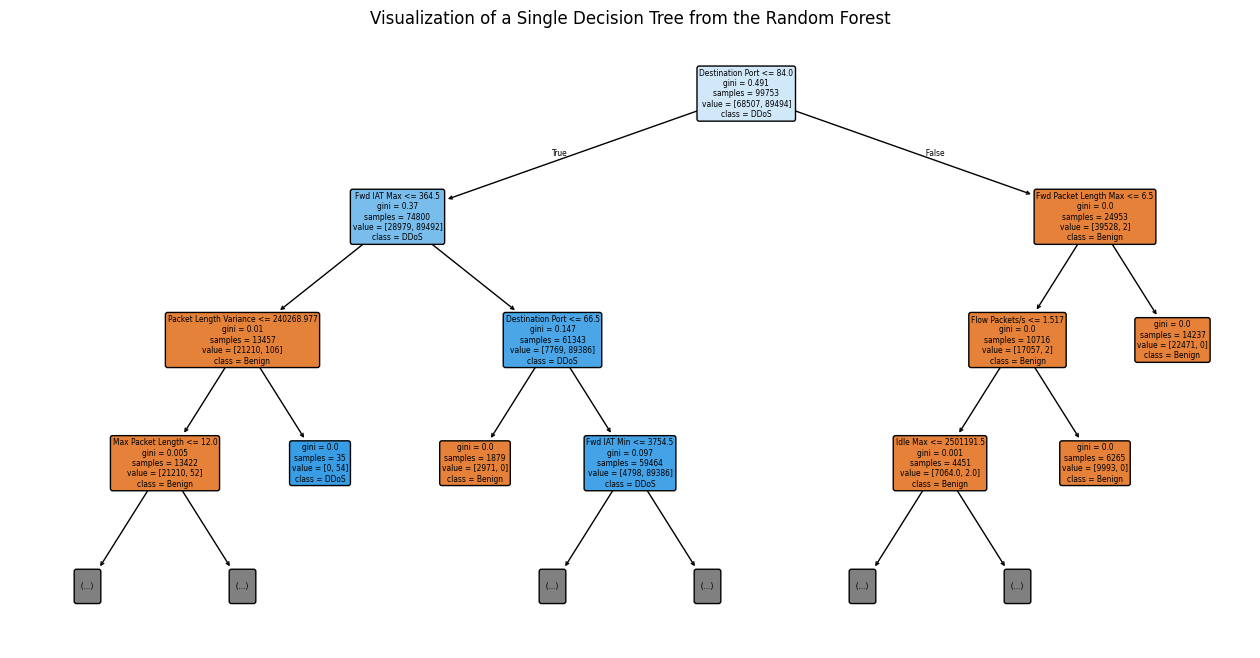

In [58]:
from sklearn.tree import plot_tree

# Extract a single tree and plot with limited depth
estimator = rf_model.estimators_[0]  # First decision tree from the forest

plt.figure(figsize=(16, 8))
plot_tree(estimator,
          feature_names=X_train.columns,
          class_names=['Benign', 'DDoS'],
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for readability
plt.title("Visualization of a Single Decision Tree from the Random Forest")
plt.show()


Evaluation

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Display the results
print("Random Forest Evaluation:")
print(f"Accuracy : {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall   : {rf_recall:.4f}")
print(f"F1 Score : {rf_f1:.4f}")


Random Forest Evaluation:
Accuracy : 0.9999
Precision: 1.0000
Recall   : 0.9999
F1 Score : 0.9999


Confusion Matrix

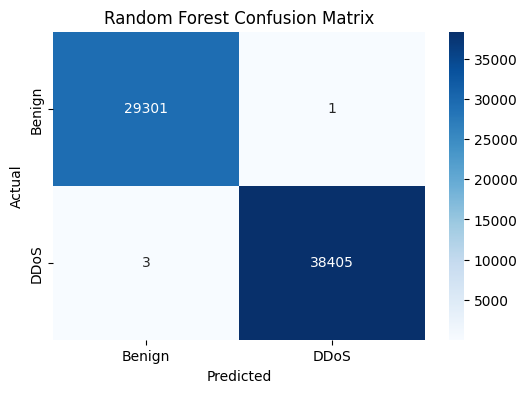

In [62]:

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Use it for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], "Random Forest Confusion Matrix")


Logistic Regression

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [66]:

# Train logistic regression model
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficient Plot

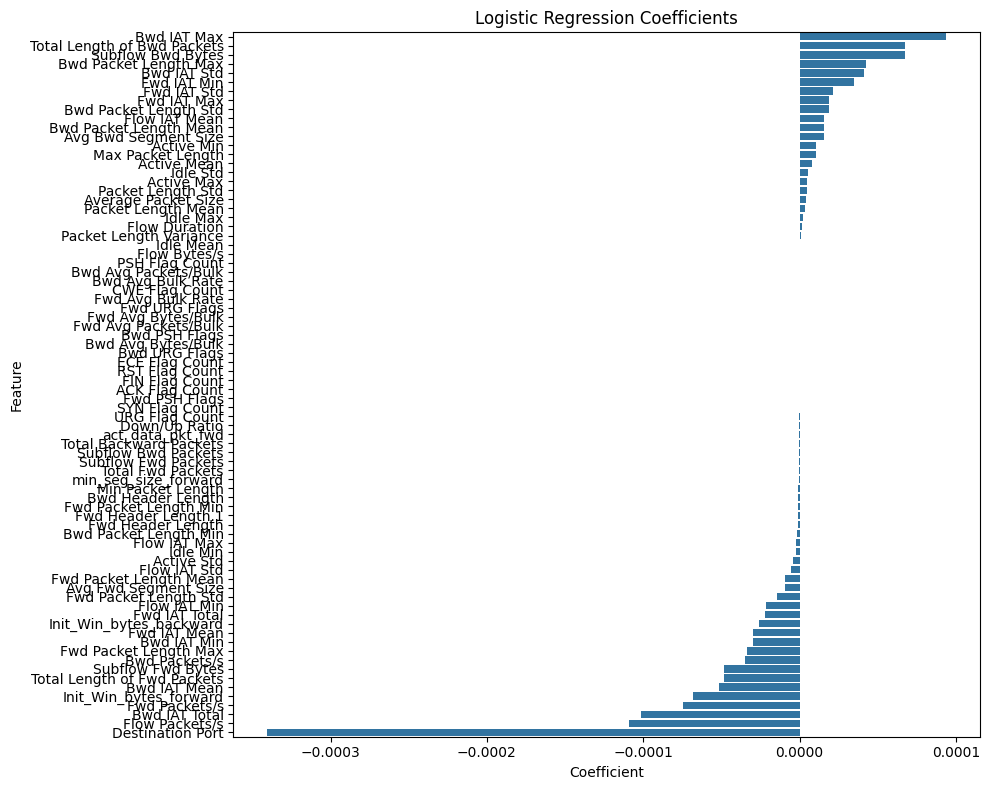

In [72]:
coefficients = lr_model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title("Logistic Regression Coefficients")
plt.tight_layout()
plt.show()


Evaluation

In [68]:
# Evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy:  {lr_accuracy:.4f}')
print(f'F1 Score:  {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall:    {lr_recall:.4f}')



Logistic Regression Metrics:
Accuracy:  0.9543
F1 Score:  0.9608
Precision: 0.9357
Recall:    0.9873


Confusion Matrix


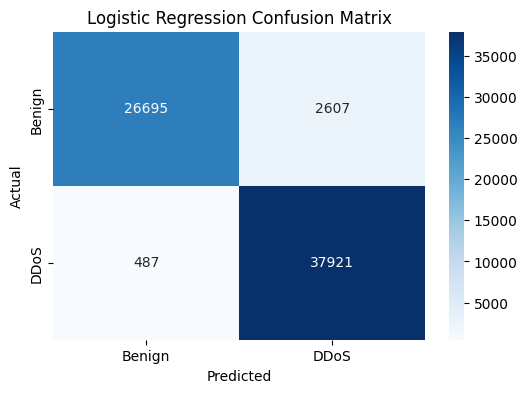

In [70]:
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], "Logistic Regression Confusion Matrix")


Neural Network

In [80]:
from sklearn.neural_network import MLPClassifier

# Define and train the model
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)
nn_model.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)

 Evaluation Metrics

In [81]:
# Evaluate Neural Network
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print('\nNeural Network (MLP) Metrics:')
print(f'Accuracy: {mlp_accuracy:.4f}')
print(f'F1 Score: {mlp_f1:.4f}')
print(f'Precision: {mlp_precision:.4f}')
print(f'Recall: {mlp_recall:.4f}')



Neural Network (MLP) Metrics:
Accuracy: 0.9997
F1 Score: 0.9997
Precision: 0.9996
Recall: 0.9998


Confusion Matrix

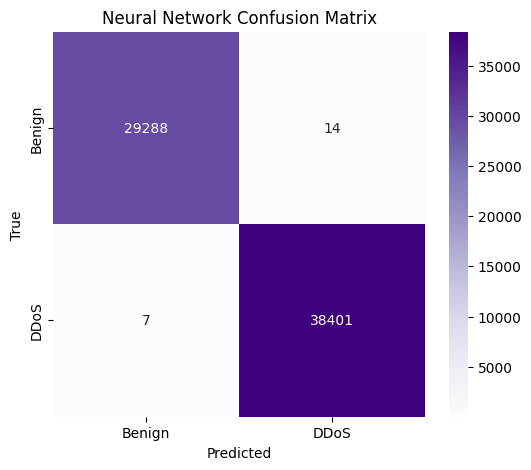

In [82]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, mlp_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')


**Comparison**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


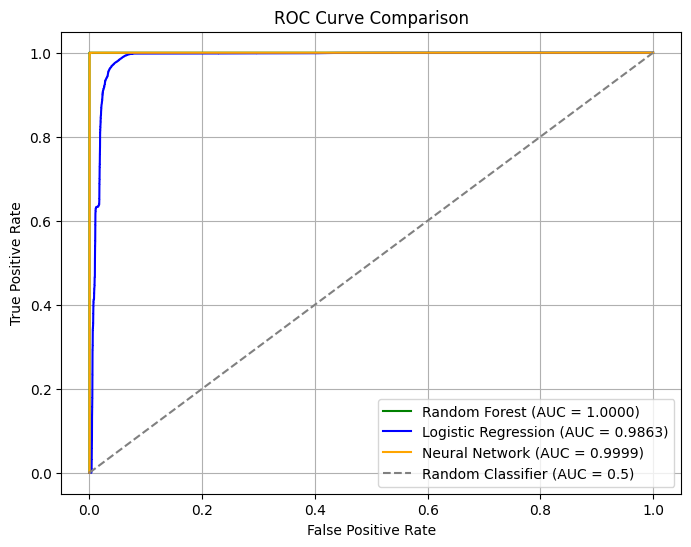

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure you're using the correct test data for each model:
# Random Forest (trained on unscaled data)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Logistic Regression and Neural Network (trained on scaled data)
lr_proba = lr_model.predict_proba(X_test_scaled_df)[:, 1]
nn_proba = nn_model.predict_proba(X_test_scaled_df)[:, 1]

# Compute ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba)

rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
nn_auc = auc(nn_fpr, nn_tpr)

# Plotting all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})', color='green')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.4f})', color='blue')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.4f})', color='orange')

# Baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()
